# Load libs and create subsets

In [ ]:
library(DESeq2)
library(dplyr)

In [2]:
colours <- c('#ff9301', '#592bf5', '#1fbd6b', '#919190', '#e377c2')
names(colours) <- c('HAstV4', 'MLB2', 'VA1', 'mock', 'mock_trypsin')

In [3]:
#load samples
samples=read.table("samples.tsv",header = T,check.names = F)
samples

condition,replicate,tissue,organoid.stage,organoid.line,timepoint,name,id
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MLB2,s1,brain,NA,NA,10d,MLB2_brain_s1_10d_VL11,VL11
MLB2,s2,brain,NA,NA,10d,MLB2_brain_s2_10d_VL12,VL12
VA1,s1,brain,NA,NA,10d,VA1_brain_s1_10d_VL13,VL13
VA1,s2,brain,NA,NA,10d,VA1_brain_s2_10d_VL14,VL14
HAstV4,s1,brain,NA,NA,10d,HAstV4_brain_s1_10d_VL15,VL15
HAstV4,s2,brain,NA,NA,10d,HAstV4_brain_s2_10d_VL16,VL16
mock,s1,brain,NA,NA,10d,mock_brain_s1_10d_VL17,VL17
mock,s2,brain,NA,NA,10d,mock_brain_s2_10d_VL18,VL18
mock_trypsin,s1,brain,NA,NA,10d,mock_trypsin_brain_s1_10d_VL19,VL19


In [4]:
gsamples <- samples[samples$tissue=='gut',]
gsamples

,condition,replicate,tissue,organoid.stage,organoid.line,timepoint,name,id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
11,mock,s1,gut,undiff,duo354,24h,mock_gut_undiff_duo354_s1_VL21,VL21
12,mock,s2,gut,undiff,duo354,24h,mock_gut_undiff_duo354_s2_VL22,VL22
13,mock,s3,gut,undiff,duo354,24h,mock_gut_undiff_duo354_s3_VL23,VL23
14,MLB2,s1,gut,undiff,duo354,24h,MLB2_gut_undiff_duo354_s1_VL24,VL24
15,MLB2,s2,gut,undiff,duo354,24h,MLB2_gut_undiff_duo354_s2_VL25,VL25
16,MLB2,s3,gut,undiff,duo354,24h,MLB2_gut_undiff_duo354_s3_VL26,VL26


In [5]:
#load genes
genes <- readRDS('../../rds/NGS-20250519/genes.rds')
dim(genes)

[1] 62757     7

In [6]:
#load protein_coding counts
pccounts = as.matrix(read.csv('../../output/NGS-20250519/counts_protein_coding.csv',row.names = 1))
dim(pccounts)

[1] 20070    16

In [7]:
#take brain counts
# Сформировать вектор нужных ID
gut_ids <- paste0("VL", 21:26)

# Отфильтровать только нужные столбцы
gpccounts <- pccounts[, gut_ids]

# Проверка
dim(gpccounts)
colnames(gpccounts)


[1] 20070     6

[1] "VL21" "VL22" "VL23" "VL24" "VL25" "VL26"

In [8]:
rownames(gsamples) = gsamples$id
colnames(gpccounts) == rownames(gsamples)
gpccounts = gpccounts[,rownames(gsamples)]
gpccounts

[1] TRUE TRUE TRUE TRUE TRUE TRUE

,VL21,VL22,VL23,VL24,VL25,VL26
ENSG00000142611,627,668,502,590,535,478
ENSG00000157911,167,188,145,176,163,140
ENSG00000142655,443,506,352,411,296,313
ENSG00000149527,24,18,25,31,25,16
ENSG00000171621,367,406,286,389,300,320
ENSG00000142583,225,224,316,362,290,293
ENSG00000173614,470,497,408,585,440,482
ENSG00000162592,0,0,0,0,0,0
ENSG00000204624,0,1,0,3,0,0
ENSG00000142606,55,59,33,51,56,39


In [9]:
rownames(gsamples) = colnames(gpccounts) = gsamples$name
deseq = DESeqDataSetFromMatrix(countData = gpccounts,
                              colData = gsamples,
                               design = ~ condition)
deseq

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 20070 6 
metadata(1): version
assays(1): counts
rownames(20070): ENSG00000142611 ENSG00000157911 ... ENSG00000268674
  ENSG00000277475
rowData names(0):
colnames(6): mock_gut_undiff_duo354_s1_VL21
  mock_gut_undiff_duo354_s2_VL22 ... MLB2_gut_undiff_duo354_s2_VL25
  MLB2_gut_undiff_duo354_s3_VL26
colData names(8): condition replicate ... name id


FALSE  TRUE 
 5643 14427 

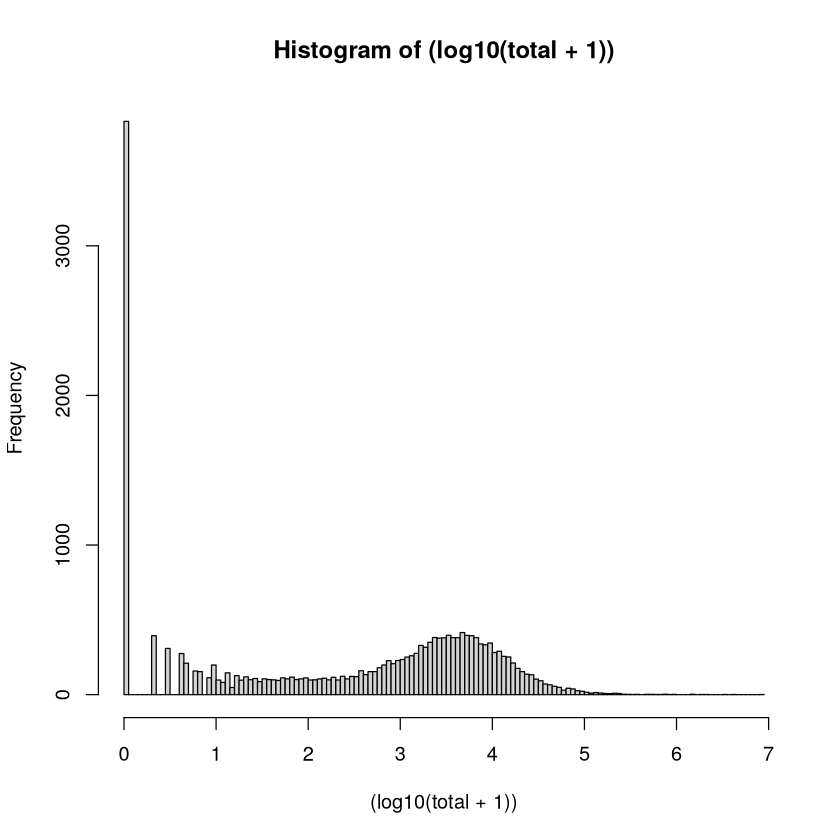

In [10]:
# filter genes by total read counts (true if >10 reads)
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)
total = rowSums(counts(deseq))
hist((log10(total + 1)),100)
table(total>=10)

In [13]:
# filter genes (Counting the number of samples where each gene has ≥10 reads (e.g., 459 genes have ≥10 reads in two samples))
ngsamples10 = rowSums(counts(deseq)>=10)
table(ngsamples10)

ngsamples10
    0     1     2     3     4     5     6 
 6521   387   245   199   206   266 12246 

In [12]:
dim(deseq)

[1] 20070     6

In [14]:
# remove genes with less than 10 reads in total in at least 2 samples.
deseq = deseq[ngsamples10>=2,]
deseq

class: DESeqDataSet 
dim: 13162 6 
metadata(1): version
assays(1): counts
rownames(13162): ENSG00000142611 ENSG00000157911 ... ENSG00000277196
  ENSG00000271254
rowData names(0):
colnames(6): mock_gut_undiff_duo354_s1_VL21
  mock_gut_undiff_duo354_s2_VL22 ... MLB2_gut_undiff_duo354_s2_VL25
  MLB2_gut_undiff_duo354_s3_VL26
colData names(8): condition replicate ... name id

In [15]:
#pre-filtering, to keep genes that have at least 10 reads in 3 or more samples
smallestGroupSize <- 3
keep <- rowSums(counts(deseq) >= 10) >= smallestGroupSize
deseq <- deseq[keep,]

In [16]:
dim(deseq)

[1] 12917     6

all viruses together

In [17]:
deseq = DESeq(deseq)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [18]:
# DESeq2 contrast for MLB2 vs mock
res <- results(deseq, contrast = c('condition', 'MLB2', 'mock'), independentFiltering = FALSE)

In [19]:
res <- list()
res[['MLB2/mock']] <- results(deseq, contrast = c('condition', 'MLB2', 'mock'), independentFiltering = FALSE)

In [20]:
res

$`MLB2/mock`
log2 fold change (MLE): condition MLB2 vs mock 
Wald test p-value: condition MLB2 vs mock 
DataFrame with 12917 rows and 6 columns
                   baseMean log2FoldChange     lfcSE       stat    pvalue
                  <numeric>      <numeric> <numeric>  <numeric> <numeric>
ENSG00000142611    562.6171    -0.08468892  0.123938 -0.6833185 0.4944056
ENSG00000157911    162.3539     0.01672209  0.183780  0.0909895 0.9275010
ENSG00000142655    380.8953    -0.28034987  0.131147 -2.1376805 0.0325427
ENSG00000149527     23.2559     0.15319215  0.457434  0.3348947 0.7377046
ENSG00000171621    340.7891     0.00363063  0.132998  0.0272984 0.9782217
...                     ...            ...       ...        ...       ...
ENSG00000198727 255808.2980      0.1368351  0.107513  1.2727312 0.2031134
ENSG00000276256    236.1113     -0.0485578  0.197128 -0.2463267 0.8054293
ENSG00000273748    145.9234      0.0172212  0.187060  0.0920629 0.9266480
ENSG00000277196     29.9194      0.9016045

In [ ]:
#Все NA в padj заменяются на 2.Это безопасно? Да, если потом фильтровать по padj < 0.05 или подобному, тогда эти гены (с padj = 2) будут автоматически исключены. Это удобный трюк, чтобы избежать ошибок при фильтрации
#я не делала

#for(n in names(res)){
#    res[[n]]$padj[is.na(res[[n]]$padj)] = 2
#}

In [21]:
levels(deseq$condition)

[1] "MLB2" "mock"

In [22]:
saveRDS(res,'../../rds/NGS-20250519/deseq2_gut_MLB2_mock.rds')

Loading required package: ggplot2

Loading required package: ggrepel



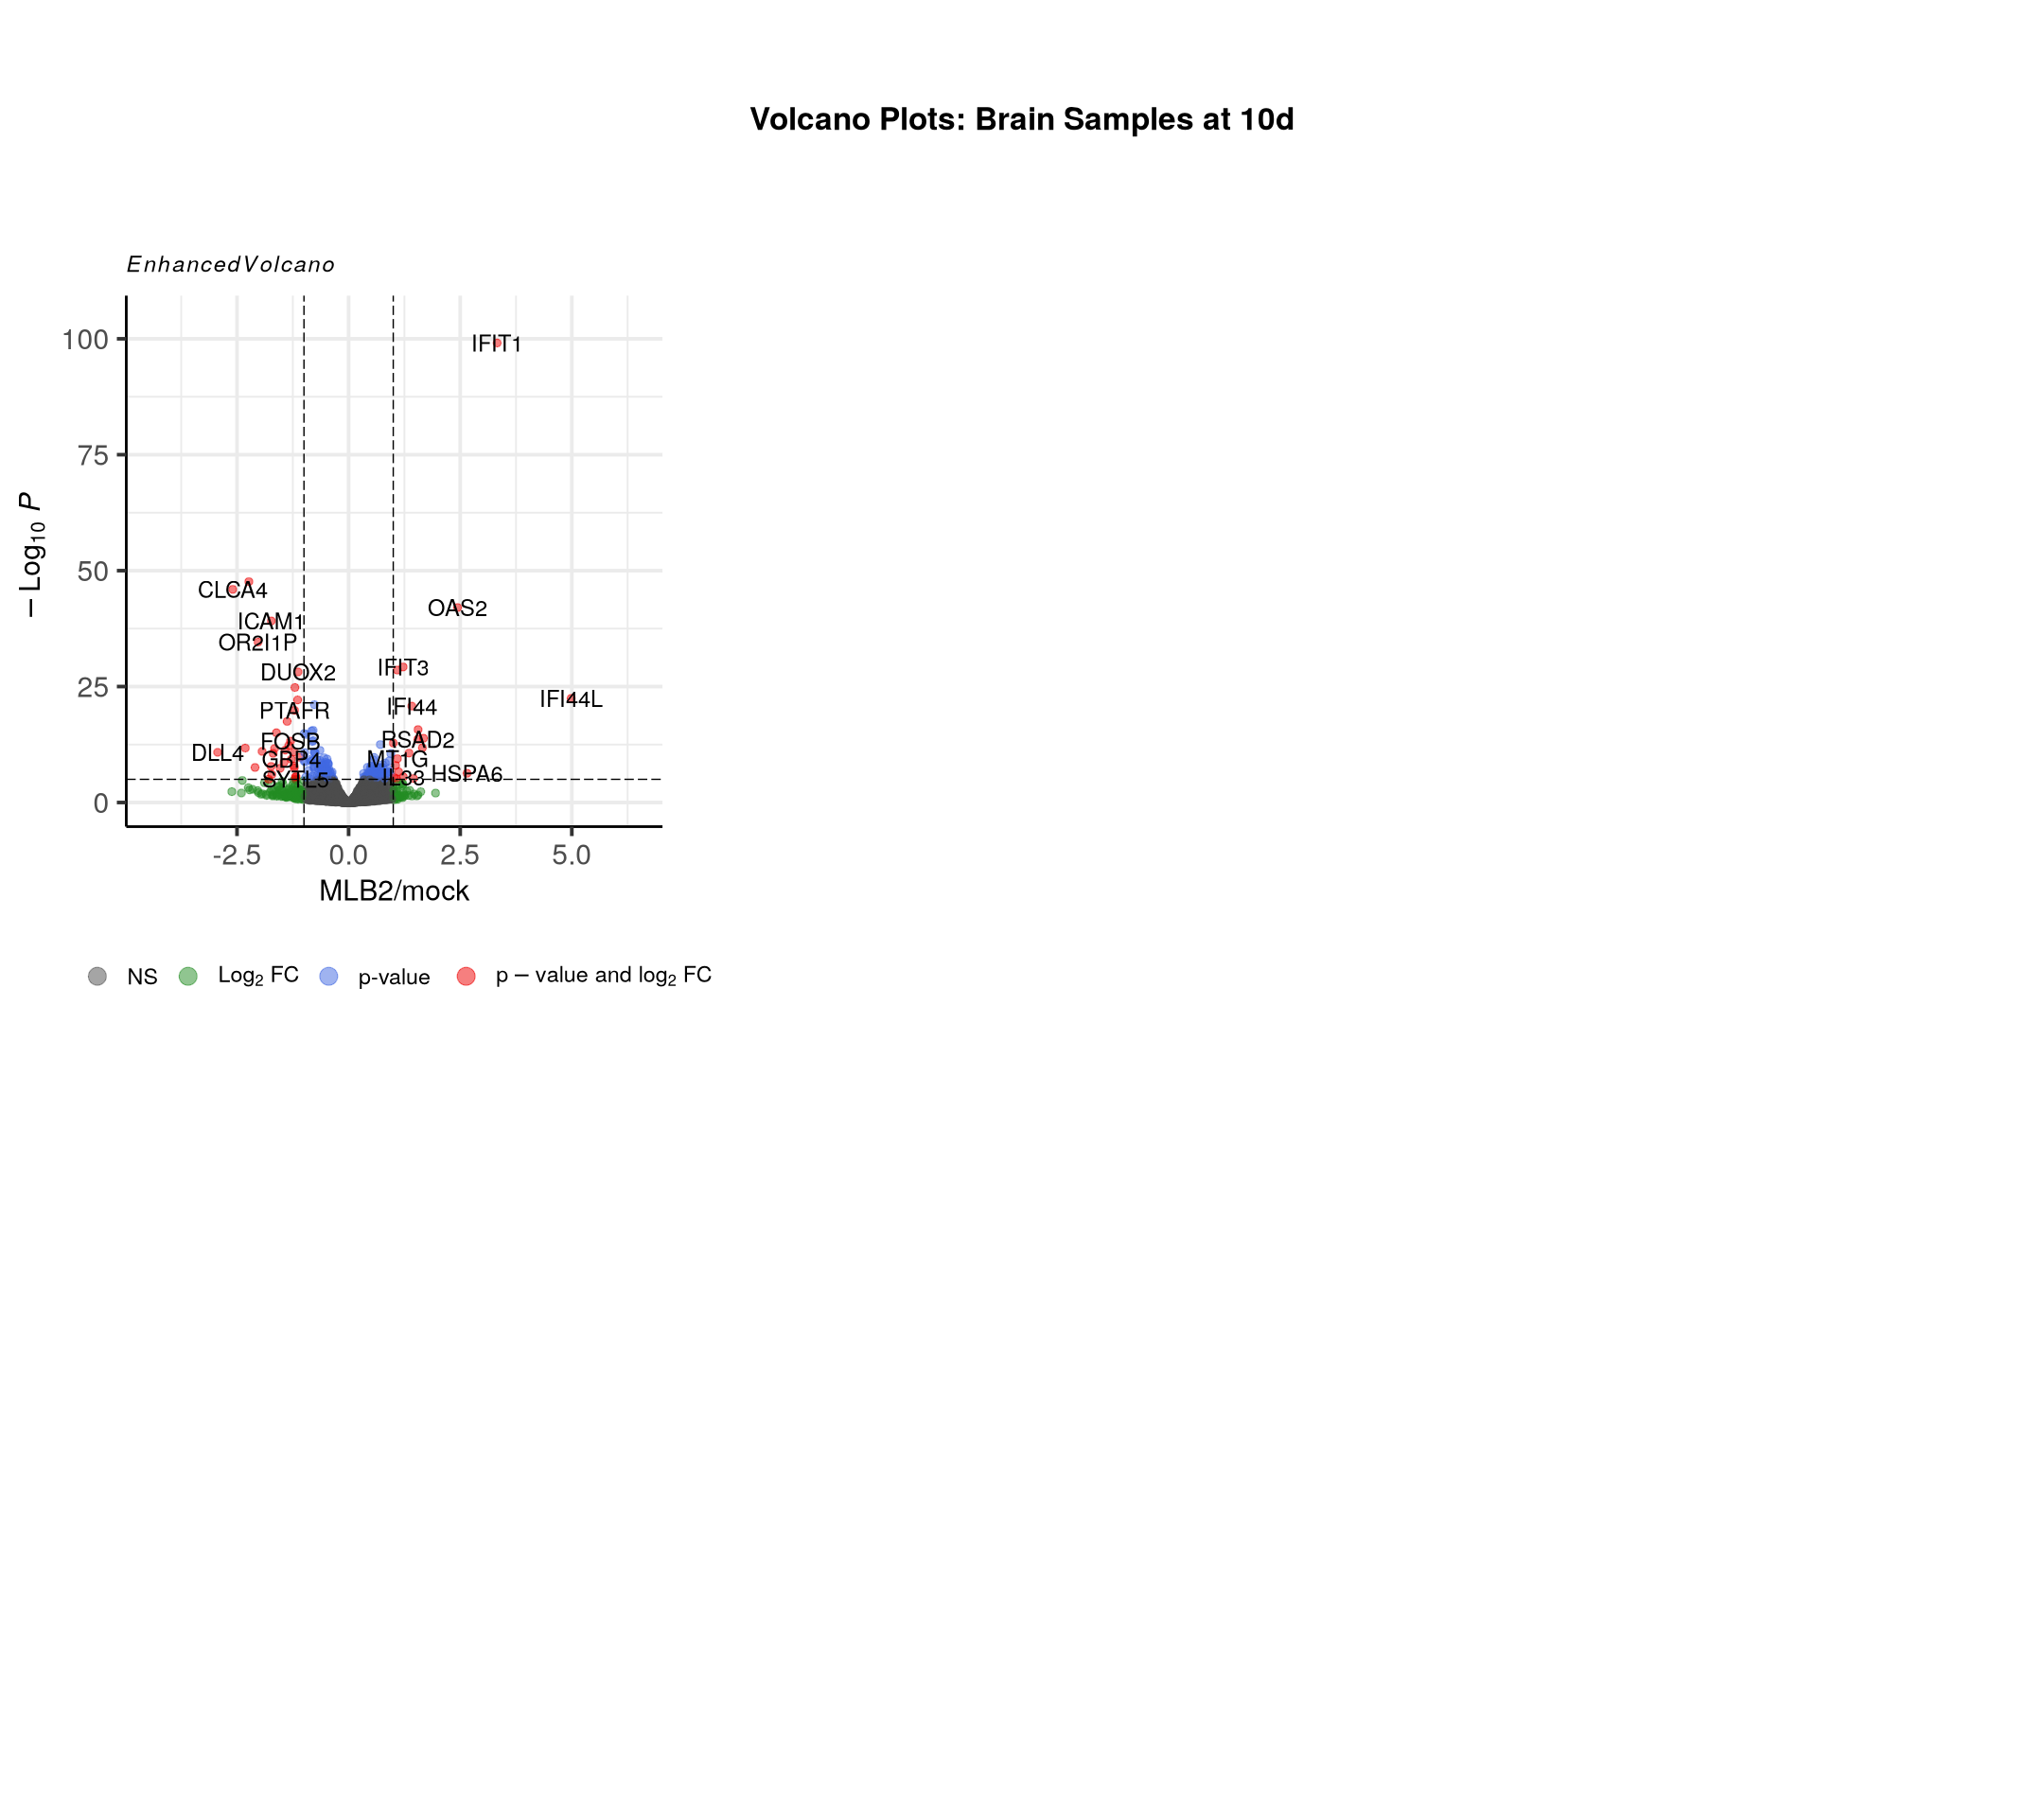

In [23]:
options(repr.plot.width = 18, repr.plot.height = 16)  # Increase height for legends

library(EnhancedVolcano)
library(cowplot)
library(ggplot2)  # Нужно для `ggdraw()`

plots = list()
for (vir_name in names(res)) {
    r = res[[vir_name]]
    plots[[vir_name]] = EnhancedVolcano(r,
        lab = genes[rownames(r), 'gene_name'],
        x = 'log2FoldChange',
        y = 'pvalue',
        xlab = vir_name, #paste0('log2(Mock/', vir_name, ')'),
        title = NULL,  # Remove individual titles
        caption = NULL
    ) + theme(legend.position = "bottom")  # Move legend below each plot
}

# Create a common title with more space
title <- ggdraw() + draw_label("Volcano Plots: Brain Samples at 10d", 
                               fontface = 'bold', size = 20, hjust = 0.5)

# Arrange all plots in one row with enough space for the title & legends
final_plot <- plot_grid(title, 
                        plot_grid(plotlist = plots, nrow = 2, ncol = 3, 
                                  align = "hv", rel_widths = c(1.5, 1.5, 1.5)), 
                        ncol = 1, rel_heights = c(0.15, 1))  # More space for title

# Display the final plot
print(final_plot)

In [24]:
ggsave("06_volcano_gut.png", final_plot, width = 24, height = 10, dpi = 300)

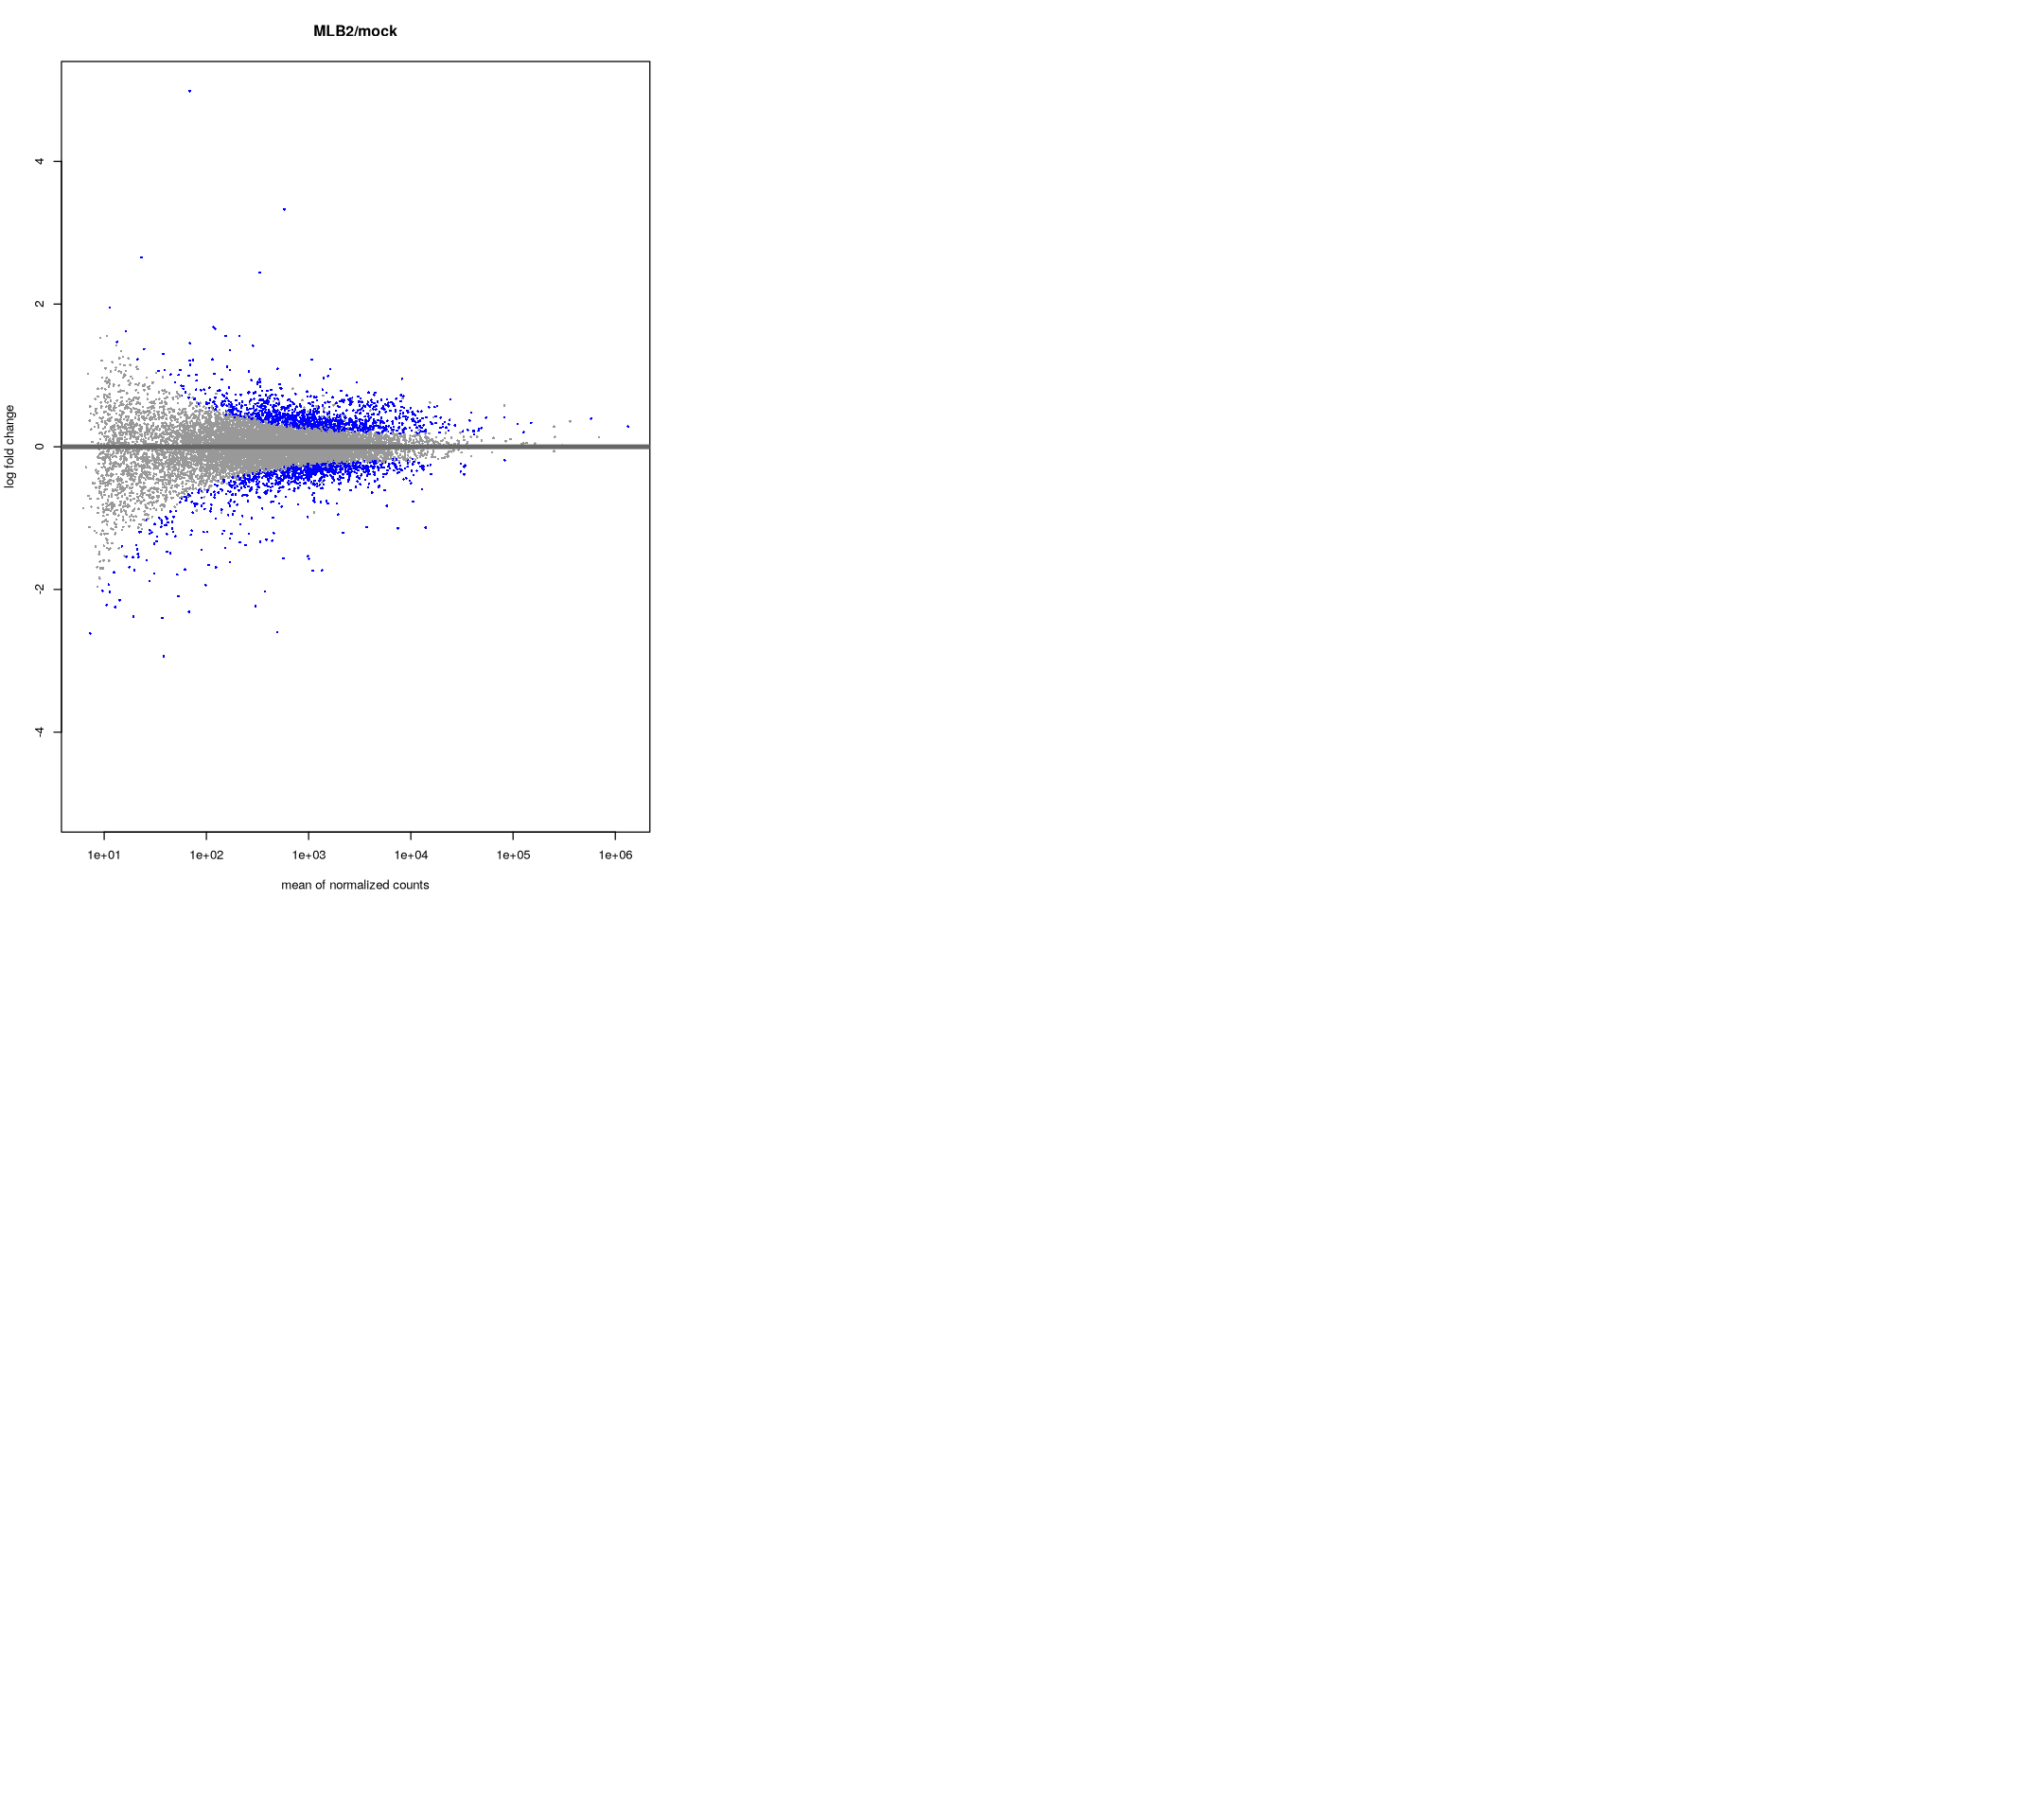

In [25]:
# Загружаем нужную библиотеку
library(DESeq2)

# Создаем MA-плоты для каждого сравнения
par(mfrow = c(2, 3)) # 2 строки, 3 колонки — под 5 графиков
for (name in names(res)) {
  plotMA(res[[name]], main = name, ylim = c(-5, 5))
}


In [26]:
summary(res[["MLB2/mock"]])


out of 12917 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1105, 8.6%
LFC < 0 (down)     : 969, 7.5%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



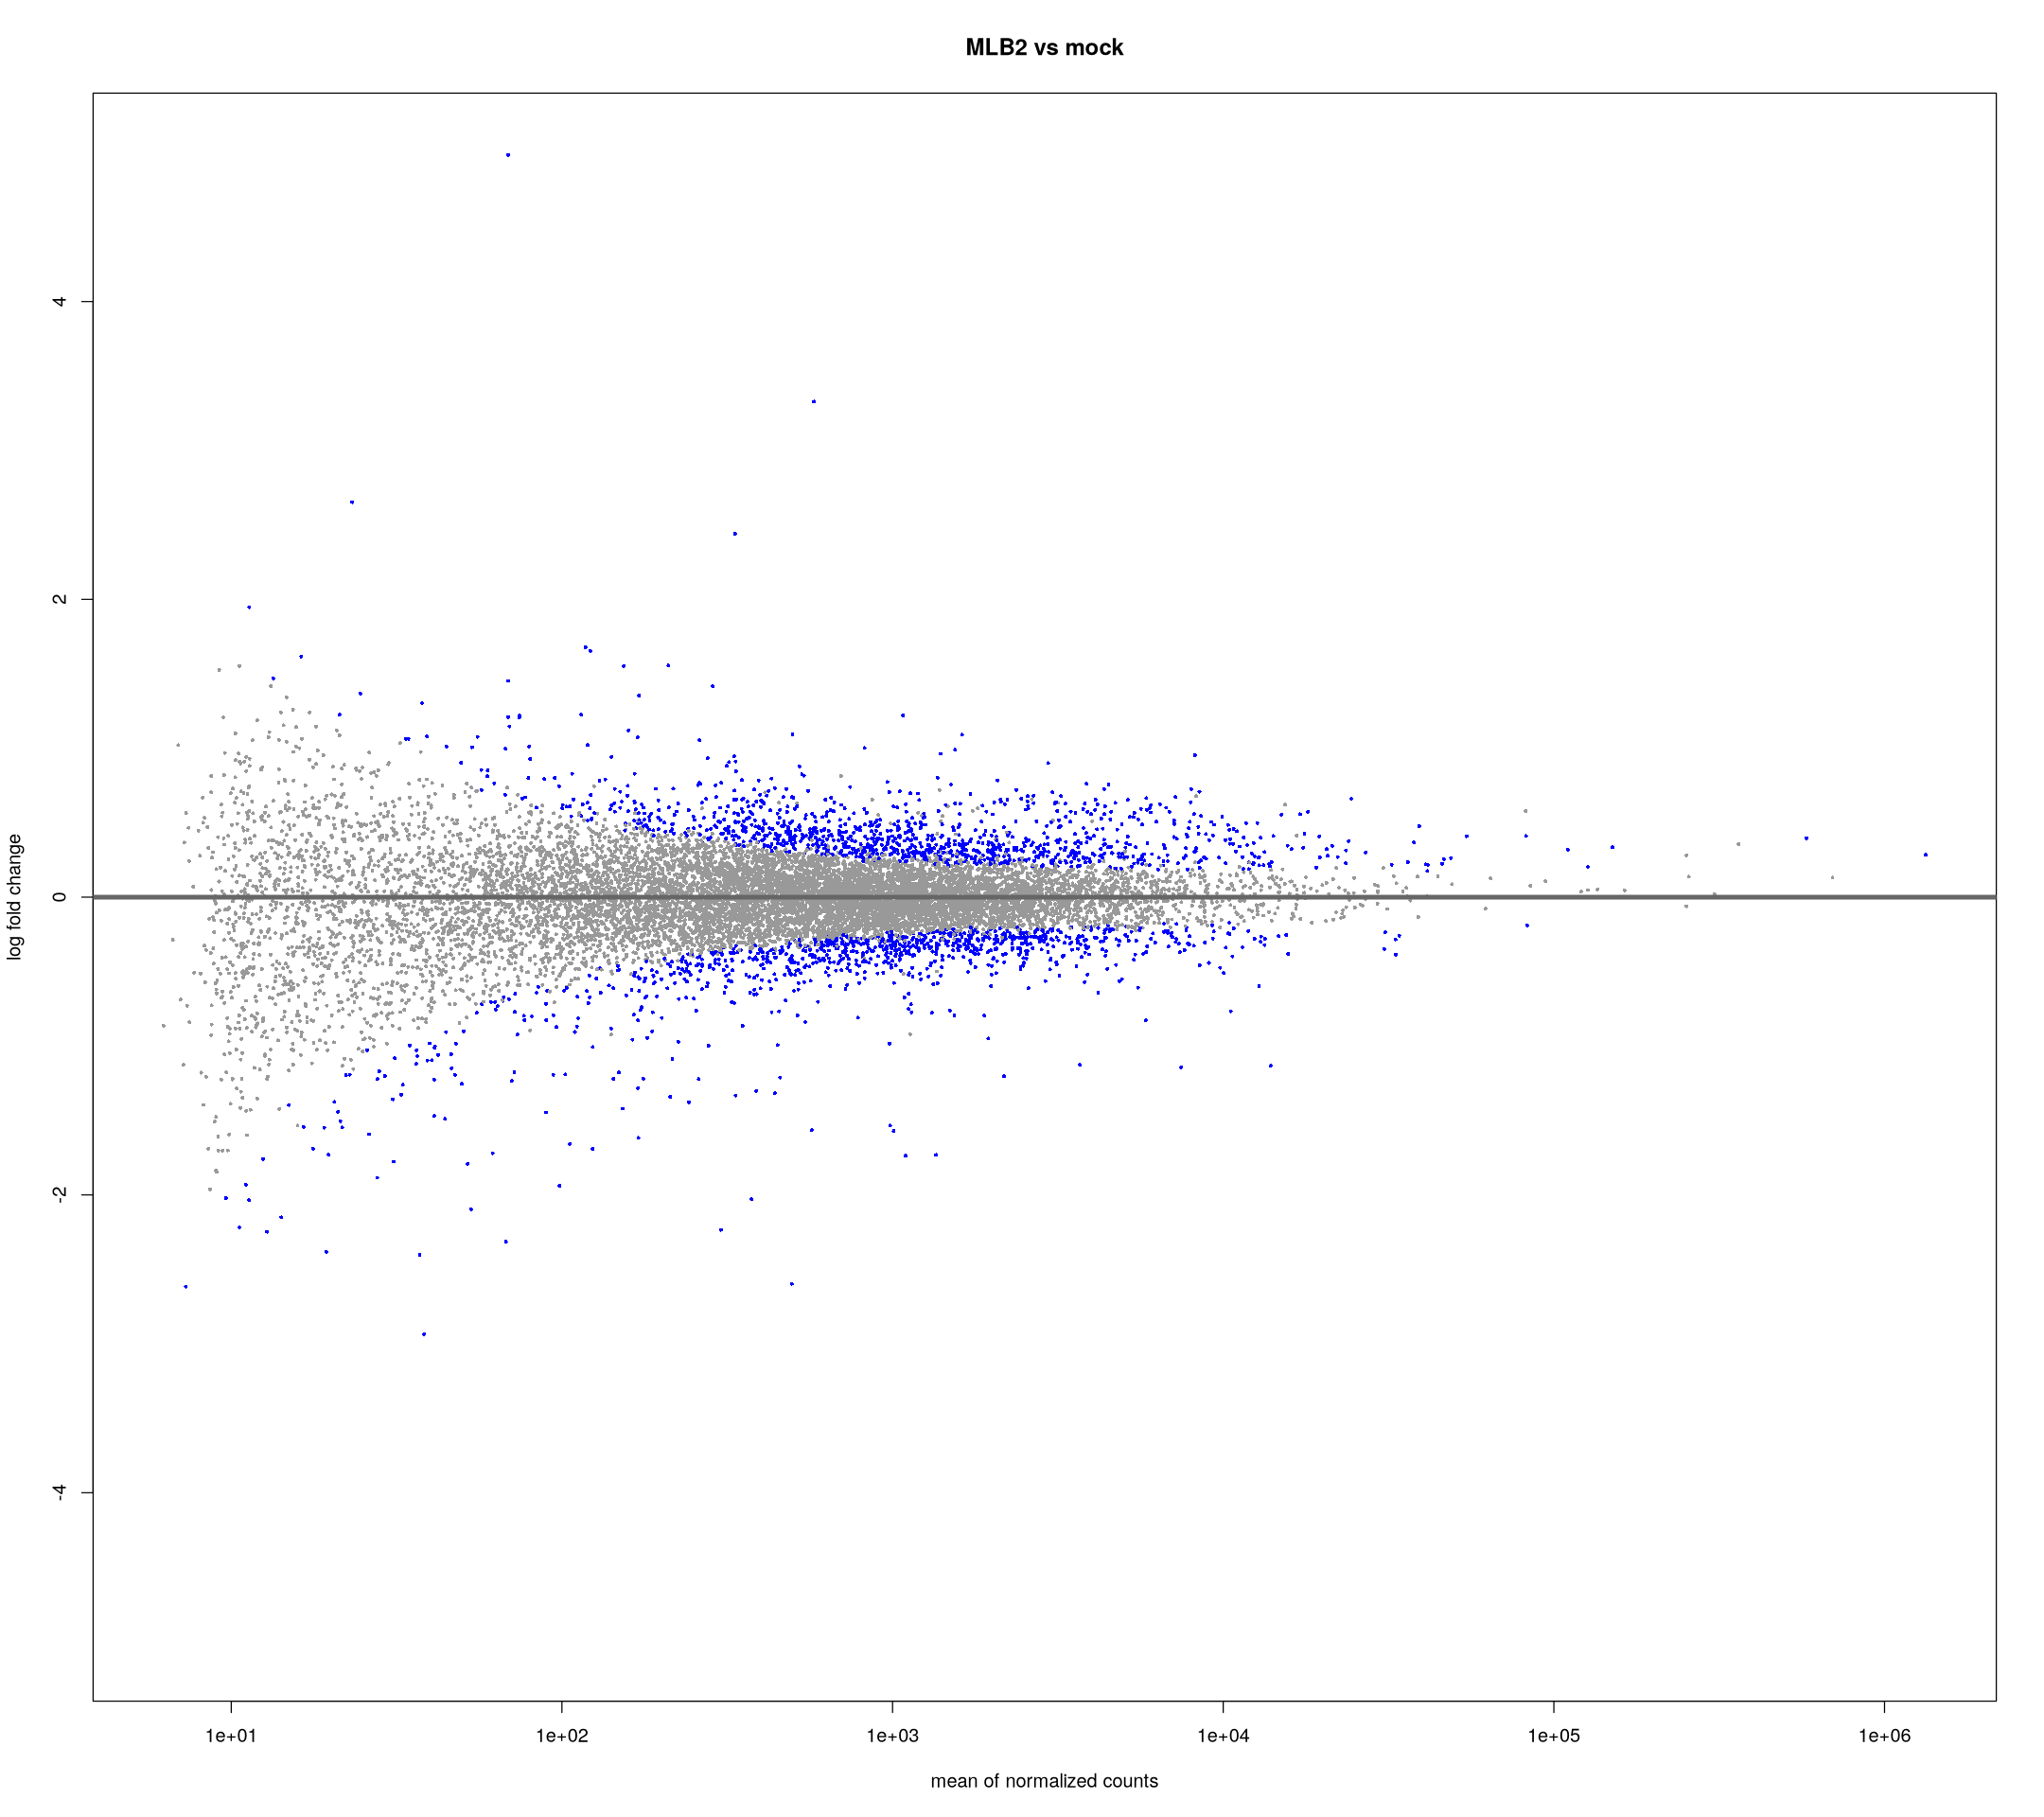

In [27]:
plotMA(res[["MLB2/mock"]], alpha = 0.1, main = "MLB2 vs mock", ylim = c(-5, 5))

In [28]:
sapply(res,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>0))
})

MLB2/mock.sign 
          1510

In [29]:
#This returns a named vector with the count of significantly differentially expressed genes for each condition
sapply(res,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>1,na.rm=T))
})

MLB2/mock.sign 
           107

In [30]:
lapply(res, function(x) {
    f = x$padj < 0.05 & abs(x$log2FoldChange) > 1  # Add log2FoldChange condition
    f[is.na(f)] = FALSE  # Handle NA values
    x = as.data.frame(x[f, c(1,2,6)])  # Select relevant columns
    x$gene_name = genes[rownames(x), 'gene_name']  # Add gene names
    x[order(x$log2FoldChange), ]  # Order by log2FoldChange
})


,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000128917,38.296004,-2.934509,4.972369e-09,DLL4
ENSG00000177675,7.288209,-2.616521,4.181289e-02,CD163L1
ENSG00000016602,495.615285,-2.596790,4.666627e-43,CLCA4
ENSG00000206073,19.362905,-2.381667,7.376801e-04,SERPINB4
ENSG00000112195,67.692846,-2.314764,7.305862e-10,TREML2
ENSG00000177202,12.827897,-2.247063,1.066756e-02,SPACA4
ENSG00000066405,302.538915,-2.234349,1.510881e-44,CLDN18
ENSG00000205869,10.582816,-2.218060,2.288017e-02,KRTAP5-1
ENSG00000117477,14.174194,-2.151042,1.875017e-02,CCDC181


In [31]:
#rds without gene_id
# Создаём папку для сохранения
dir.create("deg_0.05_1", showWarnings = FALSE)

# Пройтись по всем результатам и сохранить отфильтрованные DEG
lapply(names(res), function(name) {
  x <- res[[name]]
  f <- x$padj < 0.05 & abs(x$log2FoldChange) > 1
  f[is.na(f)] <- FALSE
  x_df <- as.data.frame(x[f, c(1, 2, 6)])
  x_df$gene_name <- genes[rownames(x_df), "gene_name"]
  x_df <- x_df[order(x_df$log2FoldChange), ]

  # Сохраняем результат как RDS
  saveRDS(x_df, file = file.path("deg_0.05_1", paste0(gsub("/", "_", name), ".rds")))
})


[[1]]
NULL

In [32]:
# Создаём папку для сохранения
dir.create("deg_0.05_1", showWarnings = FALSE)

# Пройтись по всем результатам и сохранить отфильтрованные DEG
lapply(names(res), function(name) {
  x <- res[[name]]
  f <- x$padj < 0.05 & abs(x$log2FoldChange) > 1
  f[is.na(f)] <- FALSE
  x_df <- as.data.frame(x[f, c(1, 2, 6)])
  
  # Добавим gene_id как колонку
  x_df$gene_id <- rownames(x_df)
  
  # Добавим gene_name из внешнего объекта genes
  x_df$gene_name <- genes[rownames(x_df), "gene_name"]
  
  # Переставим колонки: gene_id, gene_name, всё остальное
  x_df <- x_df[, c("gene_id", "gene_name", setdiff(colnames(x_df), c("gene_id", "gene_name")))]
  
  # Сортировка по log2FC
  x_df <- x_df[order(x_df$log2FoldChange), ]
  
  # Сохраняем
  saveRDS(x_df, file = file.path("deg_0.05_1", paste0(gsub("/", "_f_", name), ".rds")))
})


[[1]]
NULL

In [34]:
# Установка пакета (если нужно)
#install.packages("openxlsx")

library(openxlsx)

# Создаем новый Excel-файл
wb <- createWorkbook()

# Путь к папке с DEG rds
files <- list.files("deg_0.05_1", pattern = "\\.rds$", full.names = TRUE)

for (f in files) {
  df <- readRDS(f)
  sheet_name <- gsub("\\.rds$", "", basename(f))
  
  addWorksheet(wb, sheet_name)
  writeData(wb, sheet = sheet_name, x = df)
  
  # Найдем колонки для форматирования
  col_lfc <- which(colnames(df) == "log2FoldChange")
  col_padj <- which(colnames(df) == "padj")
  
  # Цветовая шкала для log2FoldChange: синий-белый-красный
  conditionalFormatting(
    wb, sheet = sheet_name,
    cols = col_lfc,
    rows = 2:(nrow(df) + 1),
    style = c("#4575B4", "#F7F7F7", "#D73027"),
    type = "colourScale"
  )
  
  # Цветовая шкала для padj: зеленый (низкие) -> белый (высокие)
  conditionalFormatting(
    wb, sheet = sheet_name,
    cols = col_padj,
    rows = 2:(nrow(df) + 1),
    style = c("#00FF00", "#FFFFFF"),
    type = "colourScale"
  )
}

# Сохраняем файл
saveWorkbook(wb, file = "DEG_results.xlsx", overwrite = TRUE)


In [64]:
lapply(names(res), function(cond) {
    x <- res[[cond]]  # Extract results for each virus
    
    # Apply filtering: padj < 0.1 and abs(log2FoldChange) > 1
    f <- x$padj < 0.05 & abs(x$log2FoldChange) > 1
    f[is.na(f)] <- FALSE  # Handle NA values

    # Convert to dataframe and add gene names
    df <- as.data.frame(x[f, c(1, 2, 6)])  
    df$gene_name <- genes[rownames(df), 'gene_name']

    # Sort by log2FoldChange
    df <- df[order(df$log2FoldChange), ]

    # Save to CSV file
    filename <- paste0(cond, "_brain_Significant_Genes.csv")  
    write.csv(df, file = filename, row.names = FALSE)

    # Print first few rows for review
    cat("\nFirst few rows for", cond, ":\n")
    print(head(df))

    return(df)  # Optional: return dataframe
})


Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file 'MLB2/mock_brain_Significant_Genes.csv': No such file or directory”


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection
